# Is MS DHONI still good to bat??
## Analysis By: SATENDER JANGRA

#### Here we are checking whether MS DHONI is still good to bat or not. We have done this analysis on purely ipl data. No international matches data has been used in this analysis.

# Final analysis
### https://satenderjangra.blogspot.com/2024/01/is-ms-dhoni-still-good-to-bat-or-not.html

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1)

In [4]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [6]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df[(df['innings'] == 1) | (df['innings'] == 2)]

In [14]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [15]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [16]:
df[df['batting_team'] == 'Chennai Super Kings'].striker.unique()

array(['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dhoni', 'SK Raina',
       'JDP Oram', 'S Badrinath', 'SP Fleming', 'S Vidyut', 'JA Morkel',
       'Joginder Sharma', 'MS Gony', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'A Flintoff', 'T Thushara', 'M Vijay', 'SB Jakati', 'GJ Bailey',
       'R Ashwin', 'JM Kemp', 'S Tyagi', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'B Laughlin',
       'AS Rajpoot', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'P Negi', 'RG More',
       'SR Watson', 'AT Rayudu', 'KM Jadhav', 'DL Chahar',
       'Harbhajan Singh', 'MA Wood', 'Imran Tahir', 'SW Billings',
       'DR Shorey', 'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali', 'RV Uthappa', 'DP Conway', 'S Dube',
       'D Pretorius', 'CJ Jordan', 'Mukesh Choudh

In [17]:
df2 = df[df['striker'] == 'MS Dhoni']

In [23]:
runs_by_season = pd.DataFrame(df2.groupby('season')['runs_off_bat'].sum()).reset_index()

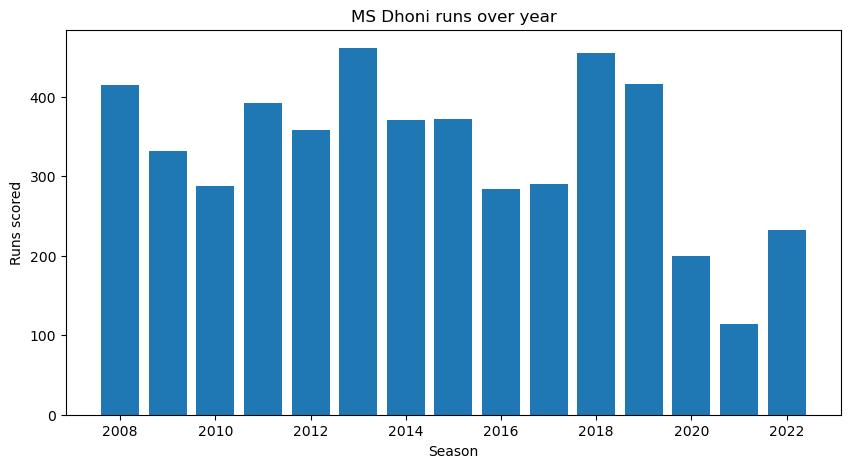

In [49]:
plt.figure(figsize = (10, 5))
plt.bar(runs_by_season.season,runs_by_season.runs_off_bat)
plt.title("MS Dhoni runs over year")
plt.xlabel('Season')
plt.ylabel('Runs scored')
plt.show()

In [41]:
balls_by_season = pd.DataFrame(df2.groupby('season')['ball'].count()).reset_index()

In [43]:
ms_df = runs_by_season.merge(balls_by_season, on = 'season', how = 'left')

In [45]:
ms_df.head(1)

,season,runs_off_bat,ball
0,2008,414,319


In [46]:
ms_df['strike_rate'] = 100*(ms_df.runs_off_bat/ms_df.ball)

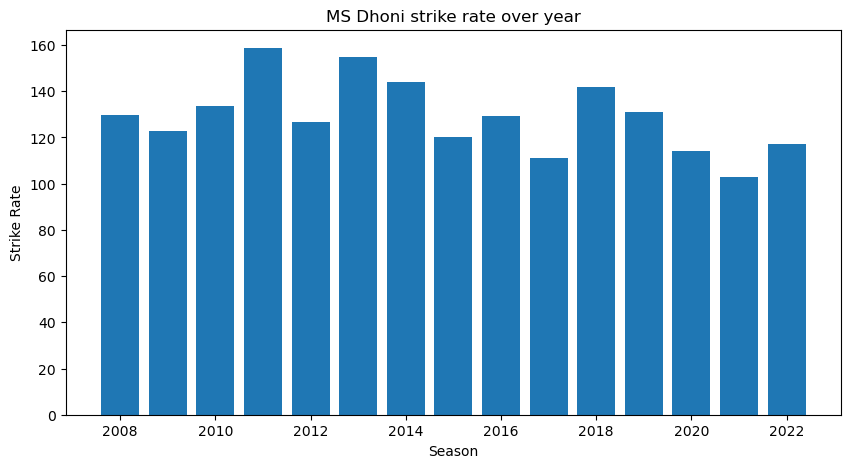

In [51]:
plt.figure(figsize = (10, 5))
plt.bar(ms_df.season,ms_df.strike_rate)
plt.title("MS Dhoni strike rate over year")
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.show()

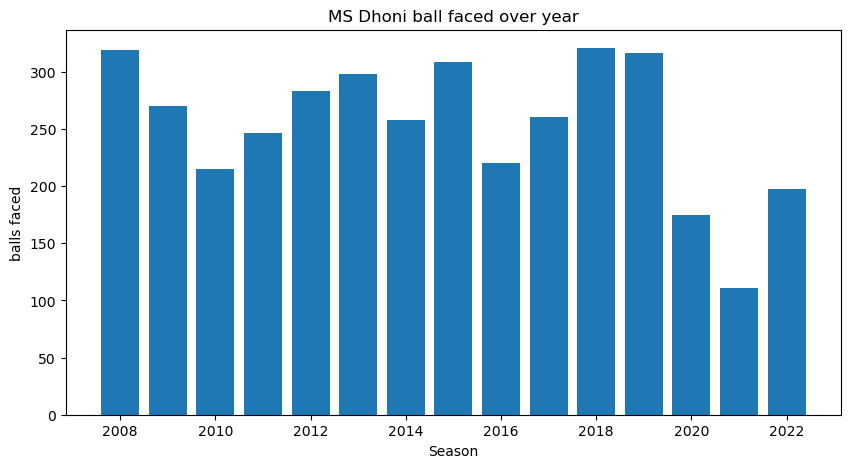

In [54]:
plt.figure(figsize = (10, 5))
plt.bar(ms_df.season,ms_df.ball)
plt.title("MS Dhoni ball faced over year")
plt.xlabel('Season')
plt.ylabel('balls faced')
plt.show()

In [69]:
boundaries = df2[(df2['runs_off_bat'] == 4) | (df2['runs_off_bat'] == 6) ]

In [87]:
boundaries_by_season = pd.DataFrame(boundaries.groupby('season')['runs_off_bat'].count()).reset_index()

In [88]:
boundaries_by_season.columns

Index(['season', 'runs_off_bat'], dtype='object')

In [89]:
boundaries_by_season =boundaries_by_season.rename(columns={'runs_off_bat':'boundary'})

In [90]:
boundaries_by_season

,season,boundary
0,2008,53
1,2009,31
2,2010,34
3,2011,48
4,2012,35
5,2013,57
6,2014,42
7,2015,44
8,2016,32
9,2017,31


In [91]:
balls_by_season.columns

Index(['season', 'ball'], dtype='object')

In [92]:
ms_df = ms_df.merge(boundaries_by_season, on ='season', how='left')

In [93]:
ms_df

,season,runs_off_bat,ball,strike_rate,boundary
0,2008,414,319,129.780564,53
1,2009,332,270,122.962963,31
2,2010,287,215,133.488372,34
3,2011,392,247,158.704453,48
4,2012,358,283,126.501767,35
5,2013,461,298,154.697987,57
6,2014,371,258,143.798450,42
7,2015,372,309,120.388350,44
8,2016,284,220,129.090909,32
9,2017,290,261,111.111111,31


In [97]:
ms_df['ball_for_boundary'] = round(ms_df['ball']/ms_df['boundary'],2)

In [98]:
ms_df

,season,runs_off_bat,ball,strike_rate,boundary,ball_for_boundary
0,2008,414,319,129.780564,53,6.02
1,2009,332,270,122.962963,31,8.71
2,2010,287,215,133.488372,34,6.32
3,2011,392,247,158.704453,48,5.15
4,2012,358,283,126.501767,35,8.09
5,2013,461,298,154.697987,57,5.23
6,2014,371,258,143.798450,42,6.14
7,2015,372,309,120.388350,44,7.02
8,2016,284,220,129.090909,32,6.88
9,2017,290,261,111.111111,31,8.42


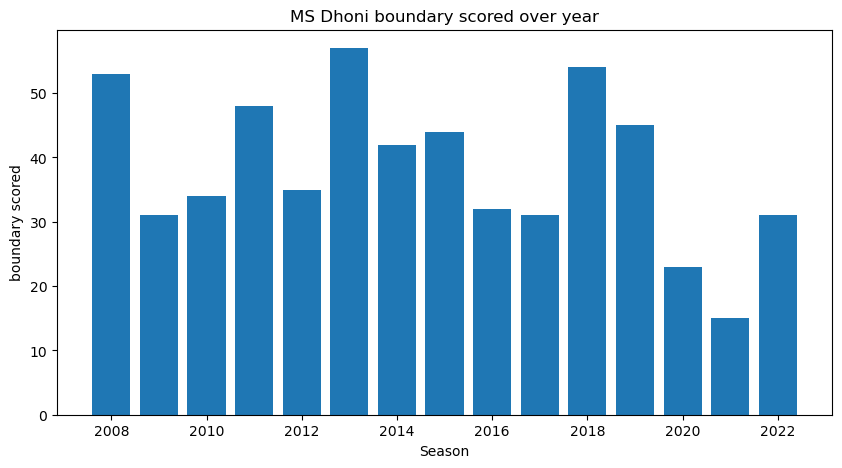

In [99]:
plt.figure(figsize = (10, 5))
plt.bar(ms_df.season,ms_df.boundary)
plt.title("MS Dhoni boundary scored over year")
plt.xlabel('Season')
plt.ylabel('boundary scored')
plt.show()

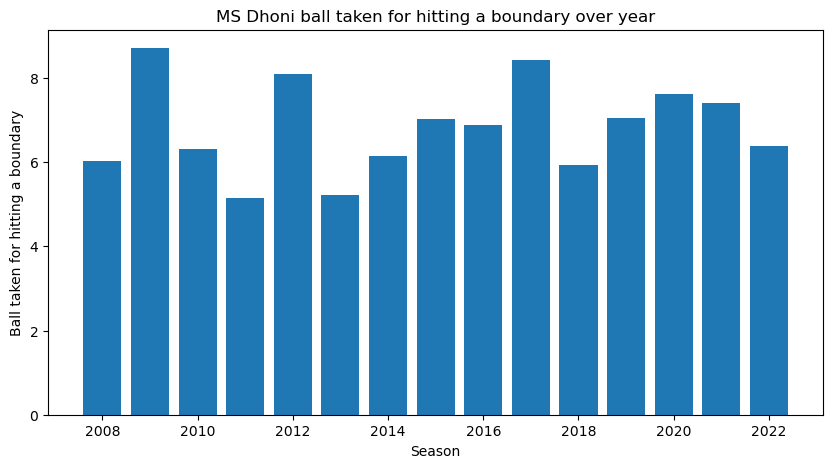

In [100]:
plt.figure(figsize = (10, 5))
plt.bar(ms_df.season,ms_df.ball_for_boundary)
plt.title("MS Dhoni ball taken for hitting a boundary over year")
plt.xlabel('Season')
plt.ylabel('Ball taken for hitting a boundary')
plt.show()

In [102]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,
        8.6,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4,
       10.5, 10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3,
       12.4, 12.5, 12.6, 12.7, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 15.1, 15.2, 15.3, 15.4, 15.5,
       15.6, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4,
       17.5, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3,
       19.4, 19.5, 19.6,  2.7,  6.7,  6.8,  8.7,  8.8,  9.7,  1.7, 12.8,
        5.7,  5.8, 13.7,  7.7,  4.7, 15.7, 13.8,  1.8, 16.7, 11.7, 11.8,
       11.9, 19.7,  3.8, 17.7, 18.7,  0.8, 10.7, 10

In [104]:
df[df.ball >= 16].ball.unique()

array([16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5,
       17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4,
       19.5, 19.6, 16.7, 19.7, 17.7, 18.7, 18.8, 19.8, 19.9, 18.9, 16.8,
       16.9, 17.8, 17.9])

In [105]:
df10 = df[df.ball >= 16]

In [106]:
df10.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [108]:
df11 = pd.DataFrame(df10.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [110]:
df12 = pd.DataFrame(df10.groupby('striker')['ball'].count()).reset_index()

In [111]:
df13 = df11.merge(df12, on='striker', how='left')

In [114]:
df13.head(1)

,striker,runs_off_bat,ball
0,A Ashish Reddy,192,129


In [115]:
df13['strike_rate'] = 100*(df13.runs_off_bat/df13.ball)

In [116]:
df13.head(1)

,striker,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,192,129,148.837209


In [159]:
dfscatter = df13[(df13.ball >300) & (df13.strike_rate>100)].reset_index()

In [162]:
dfscatter.columns

Index(['index', 'striker', 'runs_off_bat', 'ball', 'strike_rate'], dtype='object')

In [163]:
dfscatter = dfscatter.drop('index',axis=1)

In [164]:
dfscatter

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,1421,635,223.779528
1,AD Russell,854,441,193.650794
2,AR Patel,553,373,148.257373
3,AT Rayudu,811,500,162.200000
4,BJ Hodge,494,305,161.967213
5,DA Miller,795,451,176.274945
6,DJ Bravo,800,444,180.180180
7,HH Pandya,998,579,172.366149
8,Harbhajan Singh,581,390,148.974359
9,IK Pathan,563,380,148.157895


Text(0, 0.5, 'Runs scored')

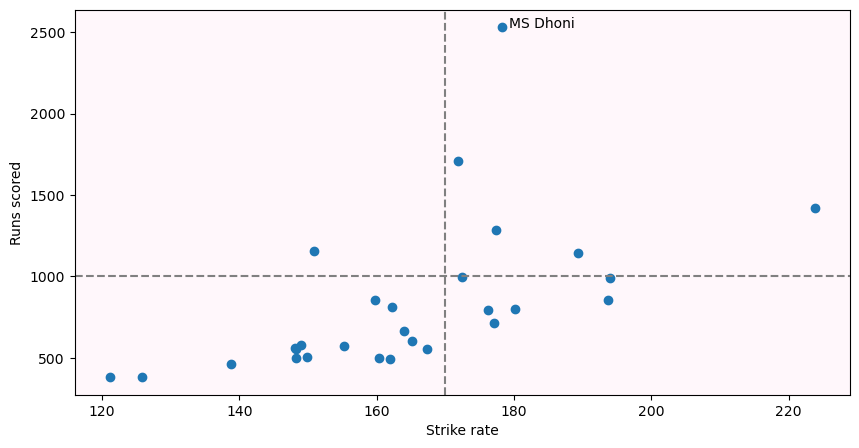

In [170]:
plt.figure(figsize = (10,5))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(dfscatter.strike_rate, dfscatter.runs_off_bat)

for i in range(len(dfscatter)):
    if dfscatter.striker[i] == 'MS Dhoni':
        plt.text(dfscatter.strike_rate[i] + 1, dfscatter.runs_off_bat[i] - 1, dfscatter.striker[i])

plt.axvline(170, ls = '--', color = 'grey')
plt.axhline(1000, ls = '--', color = 'grey')
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')